# EQUIPO RIGNON

## 1. Importar librerías a utilizar en el análisis de datos y visualización

In [1]:
#Librerías de análisis y visualización de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import stats
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")

## 2. Descripción de las variables:

Estas son las variables que se utilizarán:

+ **gender:** Indica el genero del paciente
+ **age:** Indica la edad del paciente
+ **hypertension:** Indica si el paciente padece o no de hipertensión
+ **heart_disease:** Indica si el paciente padece o no de enfermedad cardiaca
+ **ever_married:** Indica si el paciente ha estado o no casado
+ **work_type:** Indica el tipo de empleo que desarrolla el paciente
+ **Residence_type:** Indica el tipo de vivienda en el que reside el paciente
+ **avg_glucose_level:** Indica el nivel de glucosa media estimada del paciente
+ **bmi:** Indica el indice de masa corporal que tiene el paciente
+ **smoking_status:** Indica si el paciente es o ha sido fumador
+ **stroke:** Indica si el paciente ha sufrido un accidente cerebrovascular o ataque cerebral

## 3. Exploración inicial de datos

In [2]:
#Se lee csv
df = pd.read_csv ('stroke_dataset.csv')

In [3]:
#Cantidad de entradas y columnas del dataset.
df.shape

(4981, 11)

In [4]:
#Información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
# Vemos las primeras cinco entradas.
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [6]:
#Visualizamos si contamos con datos nulos
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

No existen valores nulos, pero tenemos valores raros que analizaremos. 

In [7]:
#Observamos que en la variable Edad tenemos pacientes menores de 2 años.
(df[df['age']<2]).age.value_counts()

1.80    9
1.32    8
1.64    8
1.08    7
1.88    7
1.24    7
1.48    6
1.72    6
0.32    5
1.00    5
0.56    5
0.24    5
0.88    5
0.72    5
0.64    4
1.56    4
0.80    4
1.40    3
1.16    3
0.48    3
0.40    2
0.08    2
0.16    1
Name: age, dtype: int64

+ Para niños menores a 2 años se tiene en cuenta los meses de vida de estos
+ Contamos con 114 pacientes menores de 2 años

In [8]:
#Verificamos si alguno sufrio de un ictus
len(df[(df['age']<2) & (df['stroke']==1)])

1

- Se identifica a un niño que tuvo un ictus pediátrico

In [9]:
#Se hace un conteo de valores con los que se encuentran casados
df.ever_married.value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

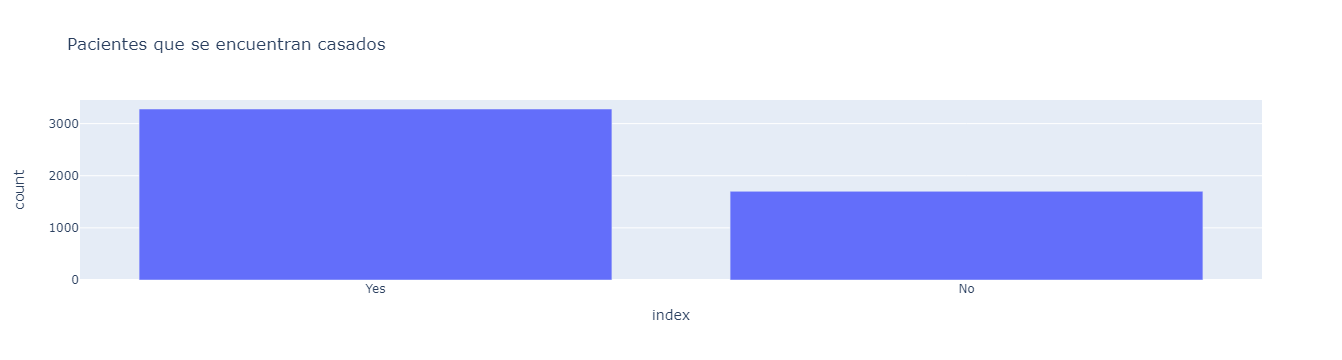

In [10]:
#Lo visualizamos en un gráfico
fig = px.bar((df['ever_married'].value_counts()).to_frame(name="count"), y="count", title="Pacientes que se encuentran casados", )
fig.show()

In [11]:
#Se hace un conteo con los tipos de trabajo de los pacientes
df.work_type.value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

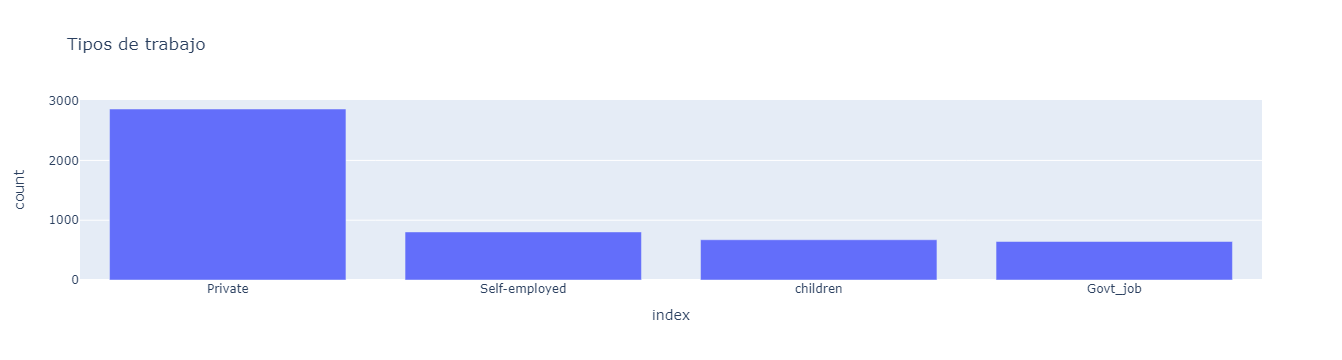

In [12]:
#Lo visualizamos en un gráfico
fig = px.bar((df['work_type'].value_counts()).to_frame(name="count"), y="count", title="Tipos de trabajo", )
fig.show()

In [13]:
#Se hace un conteo con los tipos de residencia de los pacientes.
df.Residence_type.value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

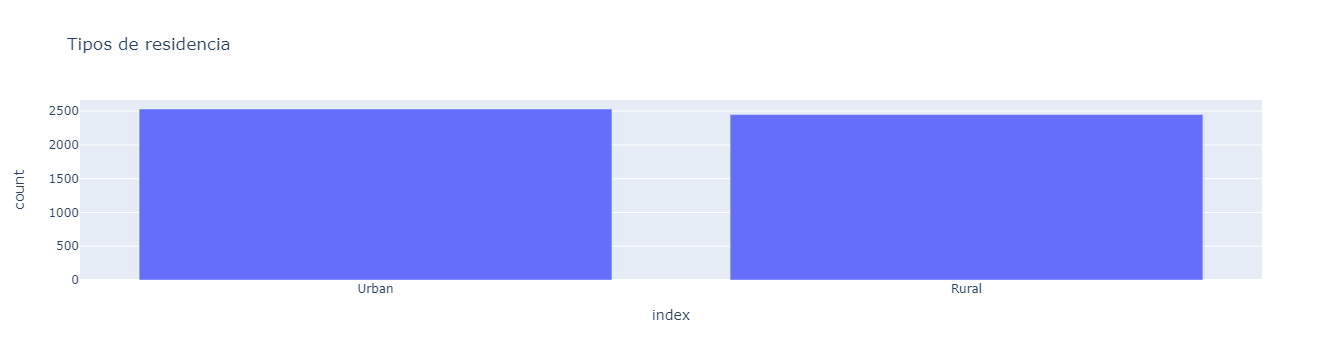

In [14]:
#Lo visualizamos en un gráfico
fig = px.bar((df['Residence_type'].value_counts()).to_frame(name="count"), y="count", title="Tipos de residencia", )
fig.show()

In [15]:
#Se hace un conteo del status de fumador de los pacientes
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

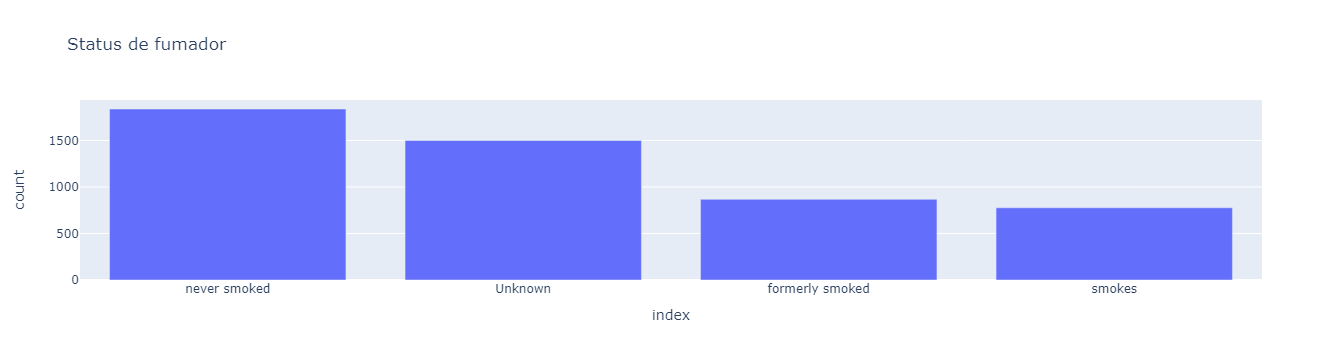

In [16]:
#Lo visualizamos en un gráfico
fig = px.bar((df['smoking_status'].value_counts()).to_frame(name="count"), y="count", title="Status de fumador", )
fig.show()

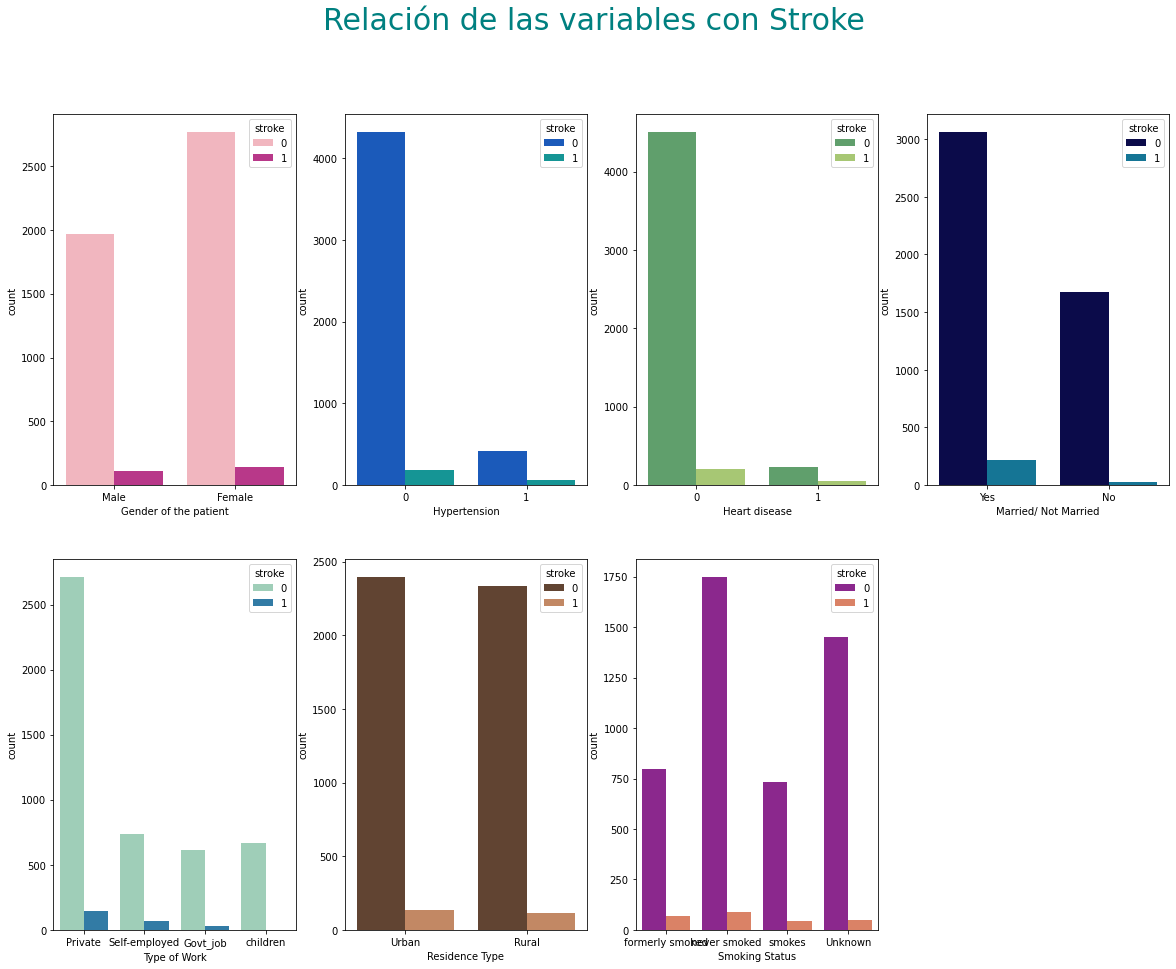

In [17]:
#Se crea un grafico para visualizar de manera simultanea todas las variables en relacion a stroke
fig, ax = plt.subplots(2, 4, figsize = (20, 15))
ax[1, 3].axis('off')

plt.suptitle('Relación de las variables con Stroke', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x ='gender', data= df, hue= 'stroke', ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= df, hue= 'stroke', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= df, hue= 'stroke', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= df, hue= 'stroke', ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= df, hue= 'stroke', ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= df, hue= 'stroke', ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= df, hue= 'stroke', ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [18]:
#Revisando duplicados:
len(df[df.duplicated()])

0

No se encontraron duplicados en el dataset.

# 3. Ingeniería de características

In [19]:
# Buscamos los valores NaN:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Decidimos dejar la categoria "Unknown" que aparece en smoking_status, tambien a los pacientes con edad menor a 2 años

In [20]:
#Se analiza los datos
df.describe() 

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [21]:
#Renombramos las variables gender y Residence_type.
df.rename(columns={'gender': 'female_gender'}, inplace=True)
df.rename(columns={'Residence_type': 'urban_residence'}, inplace=True)

In [22]:
#Despues de renombrarlas las pasamos a binarias, hacemos lo mismo con la variable ever_married.
df["female_gender"] = df["female_gender"].apply(lambda x: 1 if x == "Female" else 0)
df["urban_residence"] = df["urban_residence"].apply(lambda x: 1 if x == "Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x == "Yes" else 0)

In [23]:
#Convertimos las variables modificadas a integer. 
df["female_gender"] = df["female_gender"].astype(int)
df["ever_married"] = df["ever_married"].astype(int)
df["urban_residence"] = df["urban_residence"].astype(int)

In [24]:
#Lo visualizamos en el dataframe
df.head()

female_gender   age  hypertension  heart_disease  ever_married  \
0              0  67.0             0              1             1   
1              0  80.0             0              1             1   
2              1  49.0             0              0             1   
3              1  79.0             1              0             1   
4              0  81.0             0              0             1   

       work_type  urban_residence  avg_glucose_level   bmi   smoking_status  \
0        Private                1             228.69  36.6  formerly smoked   
1        Private                0             105.92  32.5     never smoked   
2        Private                1             171.23  34.4           smokes   
3  Self-employed                0             174.12  24.0     never smoked   
4        Private                1             186.21  29.0  formerly smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [25]:
#Obsevamos los cambios realizados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female_gender      4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   object 
 6   urban_residence    4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(3), int64(3), object(2)
memory usage: 369.8+ KB


In [26]:
#Se analiza los datos con los nuevos valores
df.describe() 

female_gender          age  hypertension  heart_disease  ever_married  \
count    4981.000000  4981.000000   4981.000000    4981.000000   4981.000000   
mean        0.583618    43.419859      0.096165       0.055210      0.658502   
std         0.493008    22.662755      0.294848       0.228412      0.474260   
min         0.000000     0.080000      0.000000       0.000000      0.000000   
25%         0.000000    25.000000      0.000000       0.000000      0.000000   
50%         1.000000    45.000000      0.000000       0.000000      1.000000   
75%         1.000000    61.000000      0.000000       0.000000      1.000000   
max         1.000000    82.000000      1.000000       1.000000      1.000000   

       urban_residence  avg_glucose_level          bmi       stroke  
count      4981.000000        4981.000000  4981.000000  4981.000000  
mean          0.508332         105.943562    28.498173     0.049789  
std           0.499981          45.075373     6.790464     0.217531  
min           0.000000          55.120000    14.000000     0.000000  
25%           0.000000          77.230000    23.700000     0.000000  
50%           1.000000          91.850000    28.100000     0.000000  
75%           1.000000         113.860000    32.600000     0.000000  
max           1.000000         271.740000    48.900000     1.000000

In [27]:
#Creamos dos variables para analizar mejor los casos de ictus en los pacientes
df_stroke = df[df['stroke']==1]
df_stroke_no = df[df['stroke']==0]

In [28]:
#Pacientes que han sufrido un ictus
df_stroke.describe()

female_gender         age  hypertension  heart_disease  ever_married  \
count     248.000000  248.000000    248.000000     248.000000    248.000000   
mean        0.564516   67.819839      0.266129       0.189516      0.883065   
std         0.496823   12.670565      0.442826       0.392711      0.321993   
min         0.000000    1.320000      0.000000       0.000000      0.000000   
25%         0.000000   59.000000      0.000000       0.000000      1.000000   
50%         1.000000   71.000000      0.000000       0.000000      1.000000   
75%         1.000000   78.000000      1.000000       0.000000      1.000000   
max         1.000000   82.000000      1.000000       1.000000      1.000000   

       urban_residence  avg_glucose_level         bmi  stroke  
count       248.000000         248.000000  248.000000   248.0  
mean          0.544355         132.175565   30.186694     1.0  
std           0.499036          61.771083    5.658245     0.0  
min           0.000000          56.110000   16.900000     1.0  
25%           0.000000          79.572500   26.975000     1.0  
50%           1.000000         105.040000   29.450000     1.0  
75%           1.000000         195.960000   32.650000     1.0  
max           1.000000         271.740000   48.900000     1.0

In [29]:
#Lo visualizamos con los datos relevantes: edad, nivel de glucosa e imc.
df_stroke[['age','avg_glucose_level','bmi']].describe()

age  avg_glucose_level         bmi
count  248.000000         248.000000  248.000000
mean    67.819839         132.175565   30.186694
std     12.670565          61.771083    5.658245
min      1.320000          56.110000   16.900000
25%     59.000000          79.572500   26.975000
50%     71.000000         105.040000   29.450000
75%     78.000000         195.960000   32.650000
max     82.000000         271.740000   48.900000

In [30]:
#Pacientes que no han sufrido un ictus
df_stroke_no.describe()

female_gender          age  hypertension  heart_disease  ever_married  \
count    4733.000000  4733.000000   4733.000000    4733.000000   4733.000000   
mean        0.584619    42.141348      0.087260       0.048172      0.646736   
std         0.492840    22.345036      0.282245       0.214153      0.478034   
min         0.000000     0.080000      0.000000       0.000000      0.000000   
25%         0.000000    24.000000      0.000000       0.000000      0.000000   
50%         1.000000    43.000000      0.000000       0.000000      1.000000   
75%         1.000000    60.000000      0.000000       0.000000      1.000000   
max         1.000000    82.000000      1.000000       1.000000      1.000000   

       urban_residence  avg_glucose_level          bmi  stroke  
count      4733.000000        4733.000000  4733.000000  4733.0  
mean          0.506444         104.569056    28.409698     0.0  
std           0.500011          43.602188     6.833637     0.0  
min           0.000000          55.120000    14.000000     0.0  
25%           0.000000          77.120000    23.500000     0.0  
50%           1.000000          91.450000    28.000000     0.0  
75%           1.000000         112.620000    32.600000     0.0  
max           1.000000         267.760000    48.900000     0.0

In [31]:
#Lo visualizamos con los datos relevantes: edad, nivel de glucosa e imc.
df_stroke_no[['age','avg_glucose_level','bmi']].describe()

age  avg_glucose_level          bmi
count  4733.000000        4733.000000  4733.000000
mean     42.141348         104.569056    28.409698
std      22.345036          43.602188     6.833637
min       0.080000          55.120000    14.000000
25%      24.000000          77.120000    23.500000
50%      43.000000          91.450000    28.000000
75%      60.000000         112.620000    32.600000
max      82.000000         267.760000    48.900000

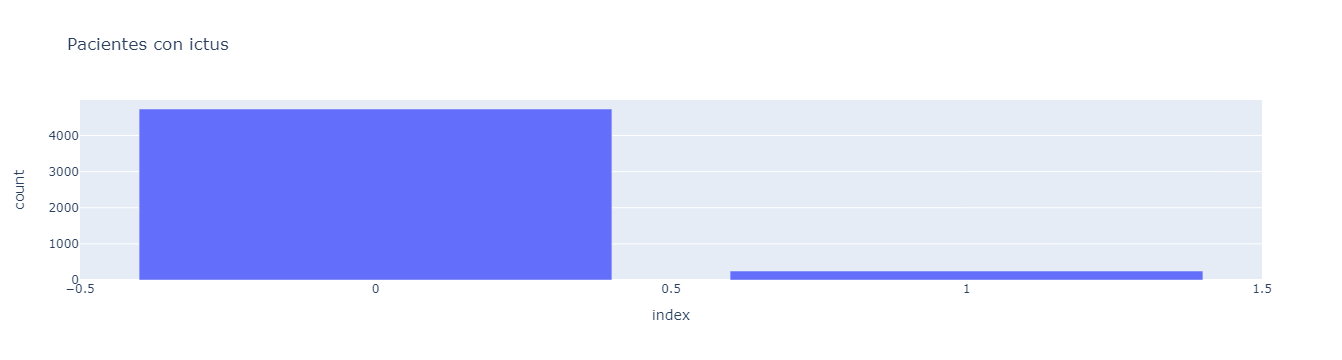

In [32]:
#Lo visualizamos en un gráfico
fig = px.bar((df['stroke'].value_counts()).to_frame(name="count"), y="count", title="Pacientes con ictus", )
fig.show()

## 3.2. Detección de *Outliers*

* Outliers de edad

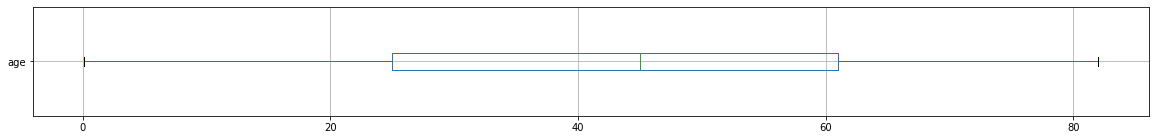

-Se detecta con Zscore > o < 3, valor de outliers para 'age' a partir de:


82.0

In [33]:
#Creamos un grafico para poder encontrar posibles outliers en la variable Edad.
df.boxplot(column='age', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'age' a partir de:")
df = df[(np.abs(stats.zscore(df["age"])) < 3)]
df['age'].max()

* Outliers de glucosa 

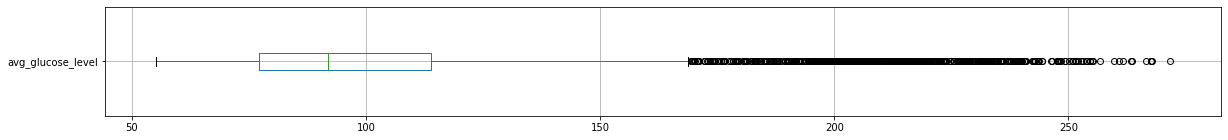

-Se detecta con Zscore > o < 3, valor de outliers para 'avg_glucose_level' a partir de:


240.86

In [34]:
#Creamos un grafico para poder encontrar posibles outliers en el nivel de glucosa.
df.boxplot(column='avg_glucose_level', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'avg_glucose_level' a partir de:")
df = df[(np.abs(stats.zscore(df["avg_glucose_level"])) < 3)]
df['avg_glucose_level'].max()

* Outliers de Masa Corporal

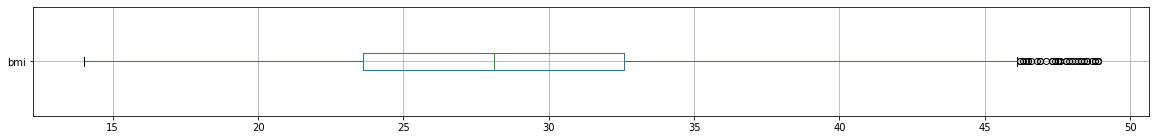

-Se detecta con Zscore > o < 3, valor de outliers para 'bmi' a partir de:


48.8

In [35]:
#Creamos un grafico para poder encontrar posibles outliers en el imc.
df.boxplot(column='bmi', return_type='axes', vert=False, figsize=(20,2))
plt.show()
print("-Se detecta con Zscore > o < 3, valor de outliers para 'bmi' a partir de:")
df = df[(np.abs(stats.zscore(df["bmi"])) < 3)]
df['bmi'].max()

In [36]:
#Se clasifican las variables numericas.
numericas = ["female_gender", "age", "hypertension", "heart_disease", "ever_married", "urban_residence", "avg_glucose_level", "bmi", "stroke"]

In [37]:
# Generando la tabla de correlación con el metodo Pearson.
corr_matrix = df[numericas].corr(method='pearson')
corr_matrix

female_gender       age  hypertension  heart_disease  \
female_gender           1.000000  0.027984     -0.016073      -0.084264   
age                     0.027984  1.000000      0.276956       0.263023   
hypertension           -0.016073  0.276956      1.000000       0.104152   
heart_disease          -0.084264  0.263023      0.104152       1.000000   
ever_married            0.029536  0.677343      0.162403       0.112680   
urban_residence         0.003316  0.016925     -0.000183       0.003452   
avg_glucose_level      -0.057599  0.219133      0.160104       0.159991   
bmi                     0.010879  0.375237      0.155959       0.062782   
stroke                 -0.003682  0.243954      0.118332       0.126310   

                   ever_married  urban_residence  avg_glucose_level       bmi  \
female_gender          0.029536         0.003316          -0.057599  0.010879   
age                    0.677343         0.016925           0.219133  0.375237   
hypertension           0.162403        -0.000183           0.160104  0.155959   
heart_disease          0.112680         0.003452           0.159991  0.062782   
ever_married           1.000000         0.007910           0.139614  0.370896   
urban_residence        0.007910         1.000000          -0.001842  0.012530   
avg_glucose_level      0.139614        -0.001842           1.000000  0.181952   
bmi                    0.370896         0.012530           0.181952  1.000000   
stroke                 0.105533         0.017304           0.119303  0.048860   

                     stroke  
female_gender     -0.003682  
age                0.243954  
hypertension       0.118332  
heart_disease      0.126310  
ever_married       0.105533  
urban_residence    0.017304  
avg_glucose_level  0.119303  
bmi                0.048860  
stroke             1.000000

In [38]:
# Se crea una función para convertir una matriz de correlación de pandas en formato tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head (50)

variable_1         variable_2         r     abs_r
37       ever_married                age  0.677343  0.677343
13                age       ever_married  0.677343  0.677343
64                bmi                age  0.375237  0.375237
16                age                bmi  0.375237  0.375237
43       ever_married                bmi  0.370896  0.370896
67                bmi       ever_married  0.370896  0.370896
19       hypertension                age  0.276956  0.276956
11                age       hypertension  0.276956  0.276956
28      heart_disease                age  0.263023  0.263023
12                age      heart_disease  0.263023  0.263023
17                age             stroke  0.243954  0.243954
73             stroke                age  0.243954  0.243954
15                age  avg_glucose_level  0.219133  0.219133
55  avg_glucose_level                age  0.219133  0.219133
69                bmi  avg_glucose_level  0.181952  0.181952
61  avg_glucose_level                bmi  0.181952  0.181952
38       ever_married       hypertension  0.162403  0.162403
22       hypertension       ever_married  0.162403  0.162403
56  avg_glucose_level       hypertension  0.160104  0.160104
24       hypertension  avg_glucose_level  0.160104  0.160104
33      heart_disease  avg_glucose_level  0.159991  0.159991
57  avg_glucose_level      heart_disease  0.159991  0.159991
25       hypertension                bmi  0.155959  0.155959
65                bmi       hypertension  0.155959  0.155959
58  avg_glucose_level       ever_married  0.139614  0.139614
42       ever_married  avg_glucose_level  0.139614  0.139614
35      heart_disease             stroke  0.126310  0.126310
75             stroke      heart_disease  0.126310  0.126310
78             stroke  avg_glucose_level  0.119303  0.119303
62  avg_glucose_level             stroke  0.119303  0.119303
74             stroke       hypertension  0.118332  0.118332
26       hypertension             stroke  0.118332  0.118332
31      heart_disease       ever_married  0.112680  0.112680
39       ever_married      heart_disease  0.112680  0.112680
76             stroke       ever_married  0.105533  0.105533
44       ever_married             stroke  0.105533  0.105533
29      heart_disease       hypertension  0.104152  0.104152
21       hypertension      heart_disease  0.104152  0.104152
27      heart_disease      female_gender -0.084264  0.084264
3       female_gender      heart_disease -0.084264  0.084264
66                bmi      heart_disease  0.062782  0.062782
34      heart_disease                bmi  0.062782  0.062782
54  avg_glucose_level      female_gender -0.057599  0.057599
6       female_gender  avg_glucose_level -0.057599  0.057599
71                bmi             stroke  0.048860  0.048860
79             stroke                bmi  0.048860  0.048860
36       ever_married      female_gender  0.029536  0.029536
4       female_gender       ever_married  0.029536  0.029536
1       female_gender                age  0.027984  0.027984
9                 age      female_gender  0.027984  0.027984

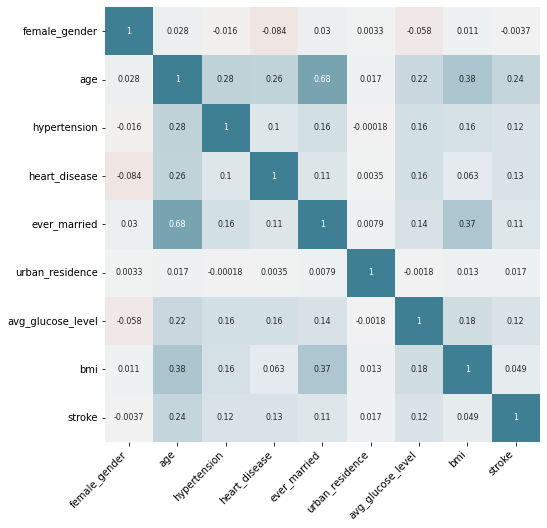

In [39]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

<AxesSubplot:>

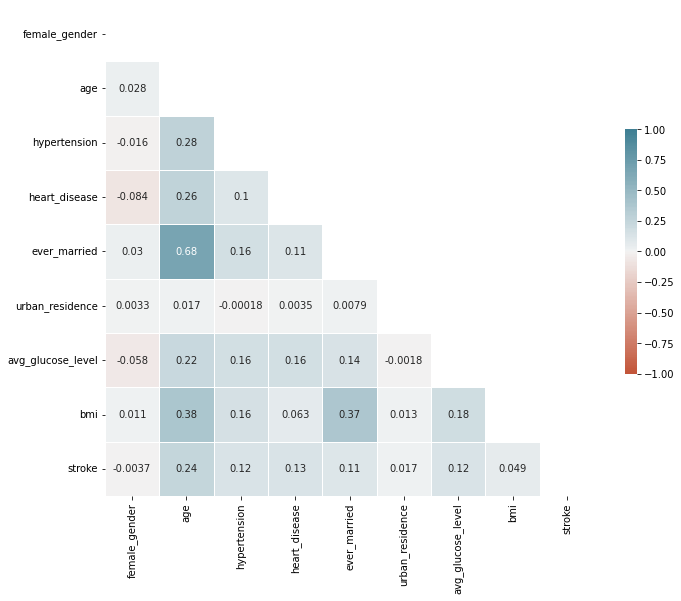

In [40]:
# A continuación se muestra un mapa de calor más amigable.
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(20, 220, n=200)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


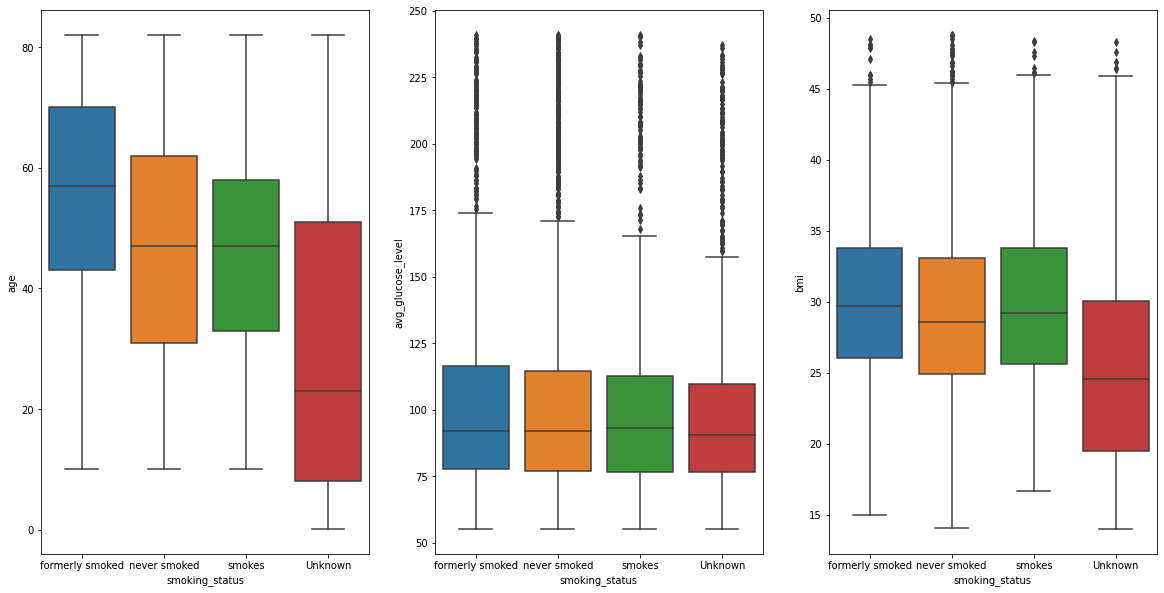

In [41]:
#Se crea un grafico para visualizar la edad, nivel de glucosa e imc; de acuerdo a su status de fumador.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(x='smoking_status', y='age', data=df)
plt.ylim()

plt.subplot(1,3,2)
sns.boxplot(x='smoking_status', y='avg_glucose_level', data=df)
plt.ylim()

plt.subplot(1,3,3)
sns.boxplot(x='smoking_status', y='bmi', data=df)
plt.ylim()

plt.show()

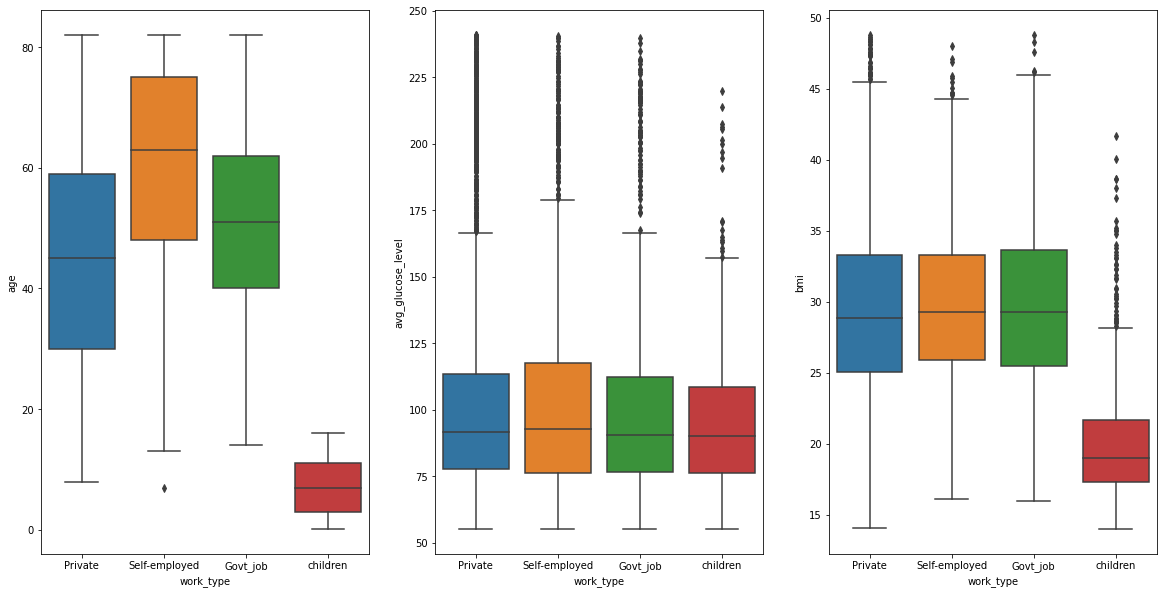

In [42]:
#Se crea un grafico para visualizar la edad, nivel de glucosa e imc; de acuerdo a su tipo de trabajo.
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(x='work_type', y='age', data=df)
plt.ylim()

plt.subplot(1,3,2)
sns.boxplot(x='work_type', y='avg_glucose_level', data=df)
plt.ylim()

plt.subplot(1,3,3)
sns.boxplot(x='work_type', y='bmi', data=df)
plt.ylim()

plt.show()

In [43]:
df_menor16 = (df[df['age']<16]) 
df_menor16.work_type.value_counts()

children         662
Private           50
Self-employed      8
Govt_job           2
Name: work_type, dtype: int64

In [44]:
#Se elimina outliers de Edad por su trabajo
indexNames = df[ (df['age'] < 16) & (df['work_type'] == 'Private') ].index 
df.drop(indexNames,inplace=True) 
indexNames = df[ (df['age'] < 16) & (df['work_type'] == 'Self-employed') ].index 
df.drop(indexNames,inplace=True) 
indexNames = df[ (df['age'] < 16) & (df['work_type'] == 'Govt_job') ].index 
df.drop(indexNames,inplace=True)

In [45]:
df_menor16 = (df[df['age']<18]) 
df_menor16.smoking_status.value_counts()

Unknown            640
never smoked        96
formerly smoked     19
smokes               8
Name: smoking_status, dtype: int64

In [46]:
#Se elimina outliers de Edad por su status de fumador
indexNames = df[ (df['age'] < 18) & (df['smoking_status'] == 'formerly smoked') ].index 
df.drop(indexNames,inplace=True)

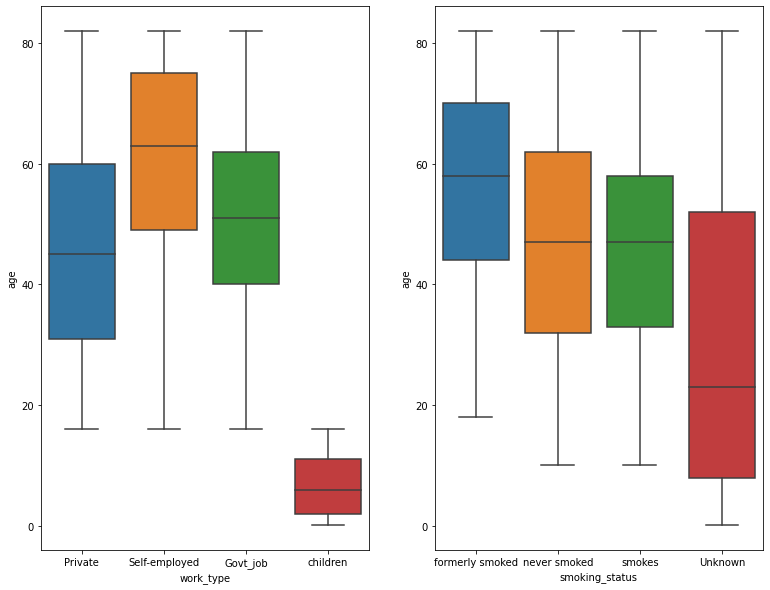

In [47]:
#Se crea un grafico para visualizar la edad, nivel de glucosa e imc; de acuerdo a su tipo de trabajo.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(x='work_type', y='age', data=df)
plt.ylim()

plt.subplot(1,3,2)
sns.boxplot(x='smoking_status', y='age', data=df)
plt.ylim()

plt.show()

In [48]:
#df_menos16 = df.drop
df.age.value_counts()

78.00    100
57.00     92
51.00     84
54.00     84
79.00     82
        ... 
1.16       3
0.48       3
0.40       2
0.08       2
0.16       1
Name: age, Length: 104, dtype: int64

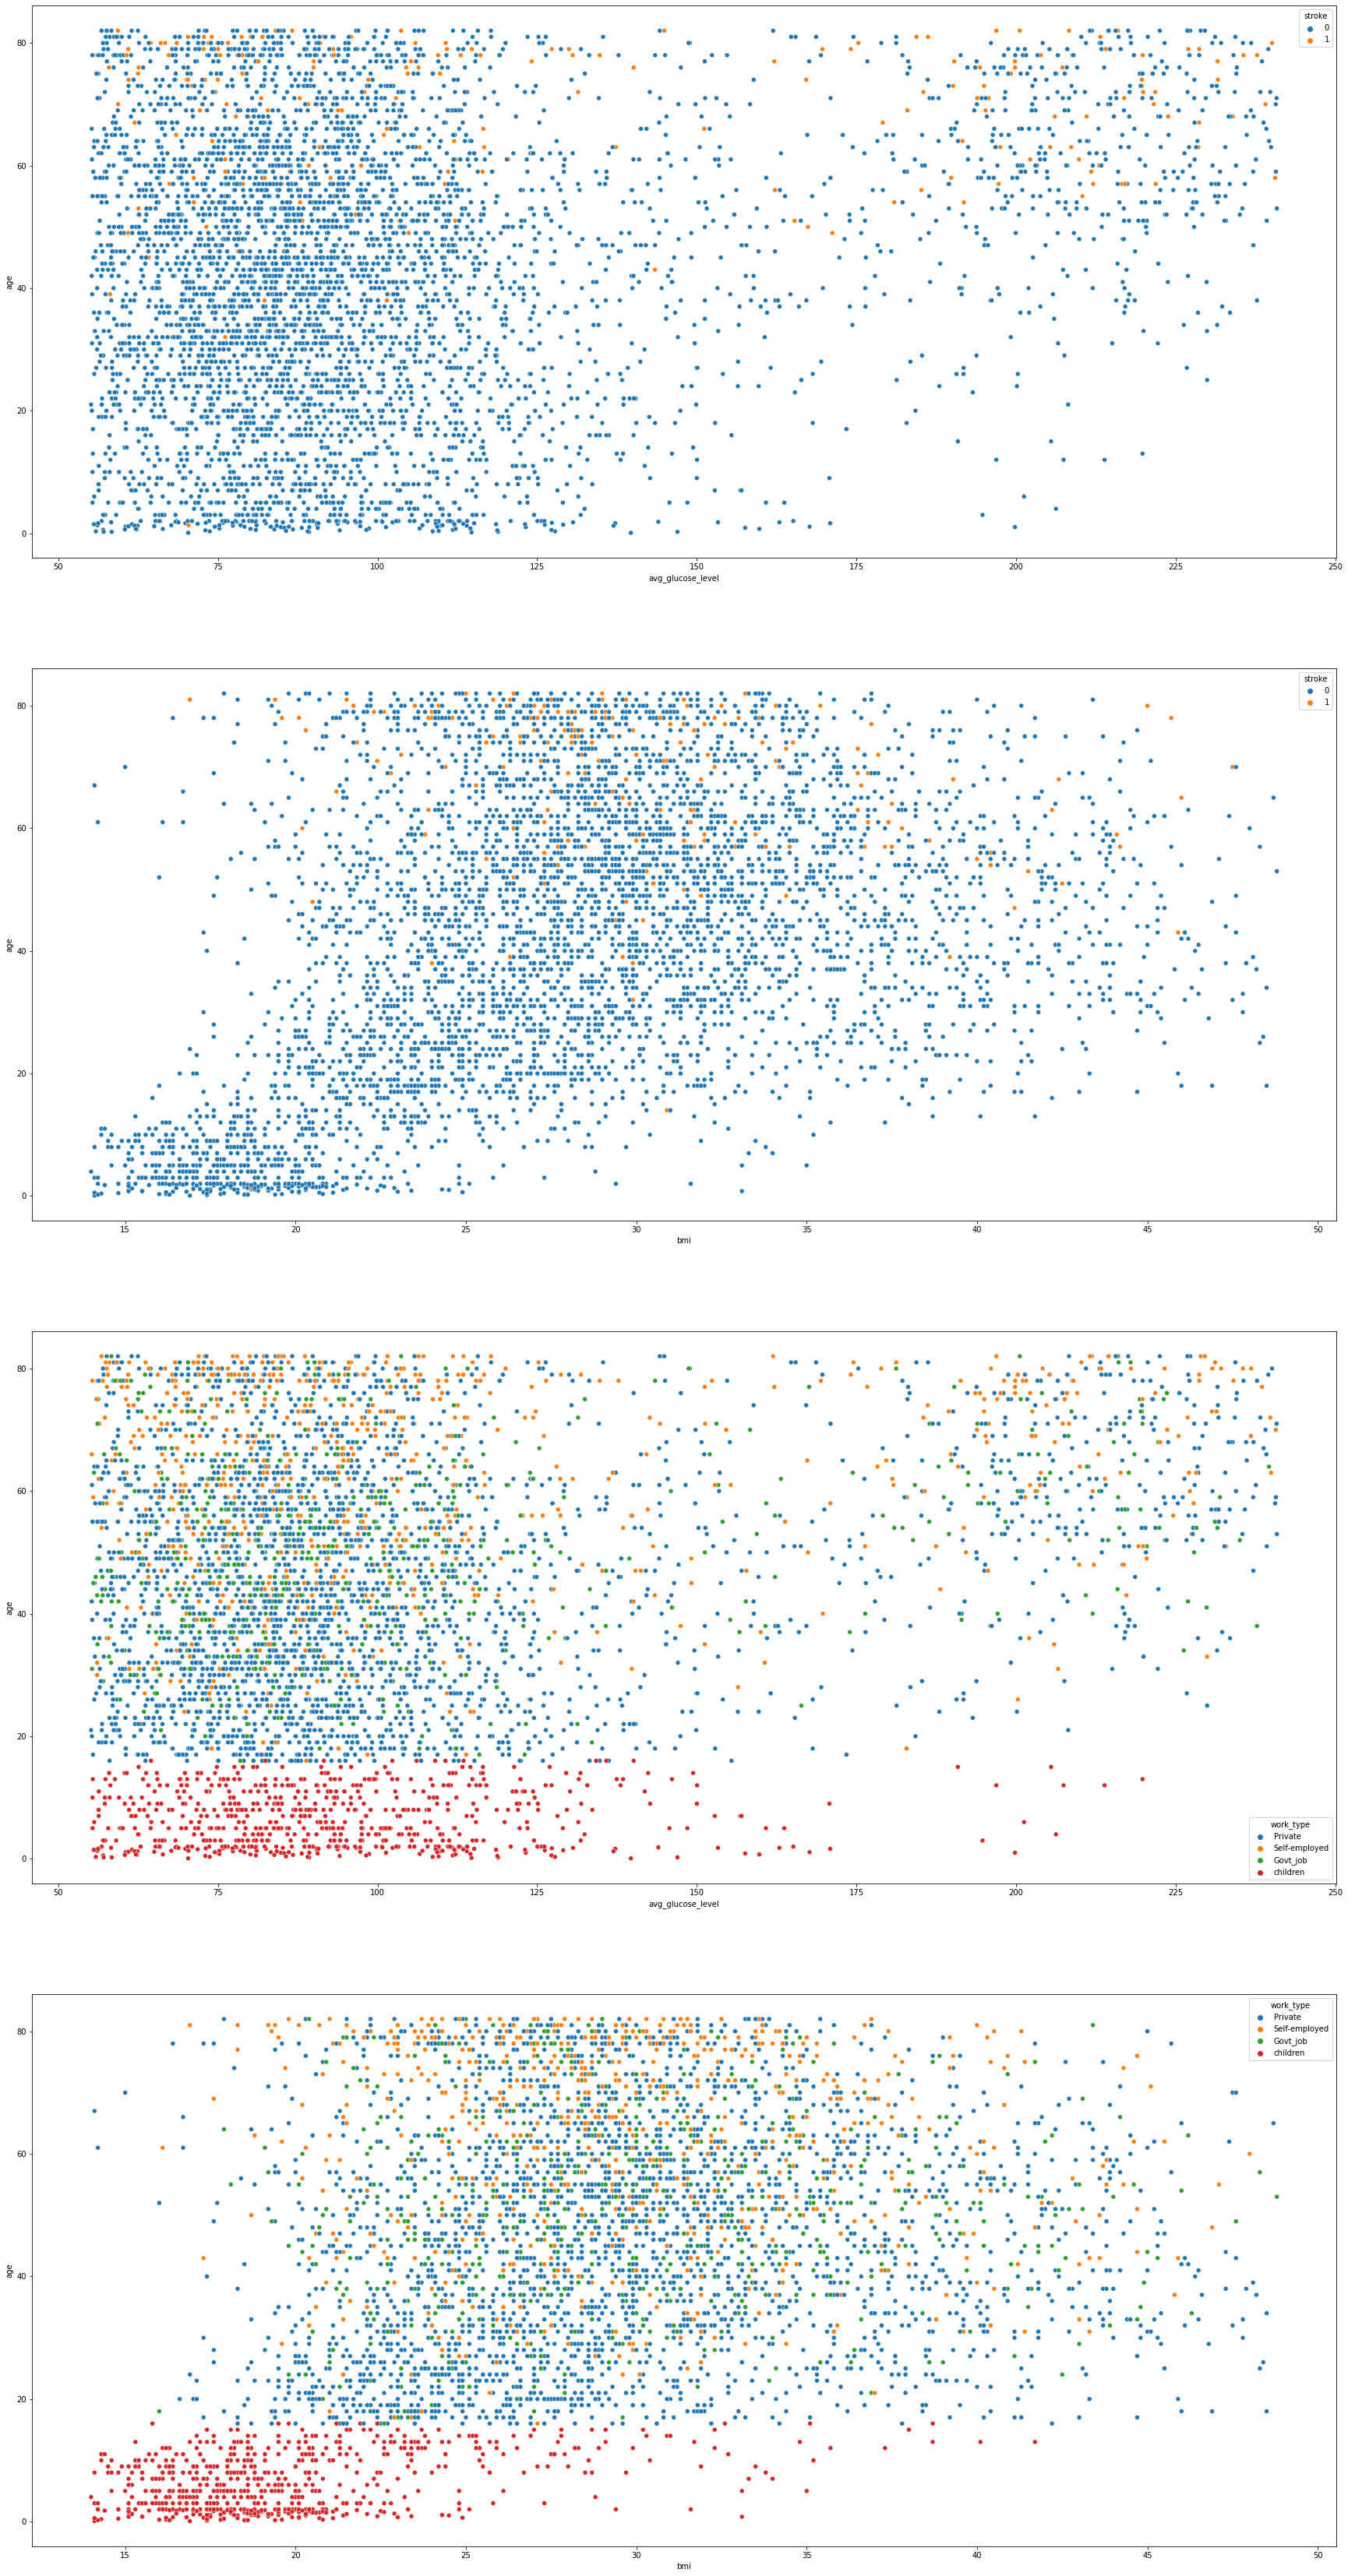

In [49]:
#Se crean los siguientes graficos para poder observar mejor las correlaciones.
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(30, 60))

#Grafico para visualizar si un paciente sufrió de un ictus segun la edad y nivel de glucosa.
plt.subplot(4,1,1)
sns.scatterplot(x="avg_glucose_level", y="age", data=df, hue="stroke")
plt.ylim()

#Grafico para visualizar si un paciente sufrió de un ictus segun la edad y su indice de masa corporal.
plt.subplot(4,1,2)
sns.scatterplot(x="bmi", y="age", data=df, hue="stroke")
plt.ylim()

#Grafico para medir la rrelacion del nivel de glucosa con la edad y el tipo de trabajo del paciente.
plt.subplot(4,1,3)
sns.scatterplot(x="avg_glucose_level", y="age", data=df, hue="work_type")
plt.ylim()

#Grafico para medir la rrelacion del indice de masa corporal con la edad y el tipo de trabajo del paciente.
plt.subplot(4,1,4)
sns.scatterplot(x="bmi", y="age", data=df, hue="work_type")
plt.ylim()

plt.show()

# BORRAR

### Creación de colummnas

In [50]:
# Se crea la lista de las condiciones de la columna.
conditions = [
    (df['age'] <= 2),
    (df['age'] > 2) & (df['age'] <= 25),
    (df['age'] > 25) & (df['age'] <= 45),
    (df['age'] > 45) & (df['age'] <= 60),
    (df['age'] > 60) & (df['age'] <= 70),
    (df['age'] > 70) & (df['age'] <= 77),
    (df['age'] > 77)
    ]

# Se les asigna nombres a las condiciones creadas
values = ['Infante', 'Juventud', 'Adultez_25a45', 'Adultez_45a60', "Vejez_60a70", "Vejez_70a77", "Vejez_mas77"]

# Se pone un nombre a la nueva columna
df['rangos_edad'] = np.select(conditions, values)

# Observamos en el Dataframe la nueva columna
df.head()

female_gender   age  hypertension  heart_disease  ever_married  \
0              0  67.0             0              1             1   
1              0  80.0             0              1             1   
2              1  49.0             0              0             1   
3              1  79.0             1              0             1   
4              0  81.0             0              0             1   

       work_type  urban_residence  avg_glucose_level   bmi   smoking_status  \
0        Private                1             228.69  36.6  formerly smoked   
1        Private                0             105.92  32.5     never smoked   
2        Private                1             171.23  34.4           smokes   
3  Self-employed                0             174.12  24.0     never smoked   
4        Private                1             186.21  29.0  formerly smoked   

   stroke    rangos_edad  
0       1    Vejez_60a70  
1       1    Vejez_mas77  
2       1  Adultez_45a60  
3       1    Vejez_mas77  
4       1    Vejez_mas77

In [51]:
#Visualizamos el conteo por las nuevas condiciones.
df.rangos_edad.value_counts()

Adultez_25a45    1283
Adultez_45a60    1137
Juventud         1002
Vejez_60a70       571
Vejez_mas77       362
Vejez_70a77       327
Infante           168
Name: rangos_edad, dtype: int64

In [52]:
# Se crea la lista de las condiciones de la columna.
conditions = [
    (df['bmi'] <= 18.5),
    (df['bmi'] > 18.5) & (df['bmi'] <= 24.9),
    (df['bmi'] > 24.9) & (df['bmi'] <= 29.9),
    (df['bmi'] > 29.9) & (df['bmi'] <= 34.9),
    (df['bmi'] > 34.9) & (df['bmi'] <= 39.9),
    (df['bmi'] > 39.9)
    ]

# Se les asigna nombres a las condiciones creadas
values = ['Bajo_peso', 'Normal', 'Sobrepeso', 'Obesidad_1', "Obesidad_2", "Obesidad_3"]

# Se pone un nombre a la nueva columna
df['IMC'] = np.select(conditions, values)

# Observamos en el Dataframe la nueva columna
df.head()

female_gender   age  hypertension  heart_disease  ever_married  \
0              0  67.0             0              1             1   
1              0  80.0             0              1             1   
2              1  49.0             0              0             1   
3              1  79.0             1              0             1   
4              0  81.0             0              0             1   

       work_type  urban_residence  avg_glucose_level   bmi   smoking_status  \
0        Private                1             228.69  36.6  formerly smoked   
1        Private                0             105.92  32.5     never smoked   
2        Private                1             171.23  34.4           smokes   
3  Self-employed                0             174.12  24.0     never smoked   
4        Private                1             186.21  29.0  formerly smoked   

   stroke    rangos_edad         IMC  
0       1    Vejez_60a70  Obesidad_2  
1       1    Vejez_mas77  Obesidad_1  
2       1  Adultez_45a60  Obesidad_1  
3       1    Vejez_mas77      Normal  
4       1    Vejez_mas77   Sobrepeso

In [53]:
#Visualizamos el conteo por las nuevas condiciones.
df.IMC.value_counts()

Sobrepeso     1457
Normal        1189
Obesidad_1    1076
Obesidad_2     496
Bajo_peso      322
Obesidad_3     310
Name: IMC, dtype: int64

In [54]:
# Se crea la lista de las condiciones de la columna.
conditions = [
    (df['avg_glucose_level'] <= 100),
    (df['avg_glucose_level'] > 100) & (df['avg_glucose_level'] <= 125),
    (df['avg_glucose_level'] > 125)
    ]

# Se les asigna nombres a las condiciones creadas
values = ['Normal', 'Prediabetico', 'Diabetico']

# Se pone un nombre a la nueva columna
df['Diabetes'] = np.select(conditions, values)

# Observamos en el Dataframe la nueva columna
df.head()

female_gender   age  hypertension  heart_disease  ever_married  \
0              0  67.0             0              1             1   
1              0  80.0             0              1             1   
2              1  49.0             0              0             1   
3              1  79.0             1              0             1   
4              0  81.0             0              0             1   

       work_type  urban_residence  avg_glucose_level   bmi   smoking_status  \
0        Private                1             228.69  36.6  formerly smoked   
1        Private                0             105.92  32.5     never smoked   
2        Private                1             171.23  34.4           smokes   
3  Self-employed                0             174.12  24.0     never smoked   
4        Private                1             186.21  29.0  formerly smoked   

   stroke    rangos_edad         IMC      Diabetes  
0       1    Vejez_60a70  Obesidad_2     Diabetico  
1       1    Vejez_mas77  Obesidad_1  Prediabetico  
2       1  Adultez_45a60  Obesidad_1     Diabetico  
3       1    Vejez_mas77      Normal     Diabetico  
4       1    Vejez_mas77   Sobrepeso     Diabetico

In [55]:
#Visualizamos el conteo por las nuevas condiciones.
df.Diabetes.value_counts()

Normal          3004
Prediabetico     943
Diabetico        903
Name: Diabetes, dtype: int64

In [56]:
#Se clasifican las variables categoricas.
categoricas = ["work_type","smoking_status"]

In [57]:
#Se crea un Dataframe con los cambios realizados
df=df[["female_gender", "age", "rangos_edad", "hypertension", "heart_disease", "ever_married", "work_type", "urban_residence", "avg_glucose_level", "Diabetes", "bmi", "IMC", "smoking_status", "stroke"]]

## 4.MODELOS PREDICTIVOS

 + TRANSFORMACION DATOS

In [58]:
numericas_no_bool = ["age", "avg_glucose_level", "bmi"]

In [59]:
#Eliminamos las columnas que no usaremos.
df=df.drop((["rangos_edad", "Diabetes", "IMC"]), axis=1)

In [60]:
#Observamos la informacion del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female_gender      4850 non-null   int32  
 1   age                4850 non-null   float64
 2   hypertension       4850 non-null   int64  
 3   heart_disease      4850 non-null   int64  
 4   ever_married       4850 non-null   int32  
 5   work_type          4850 non-null   object 
 6   urban_residence    4850 non-null   int32  
 7   avg_glucose_level  4850 non-null   float64
 8   bmi                4850 non-null   float64
 9   smoking_status     4850 non-null   object 
 10  stroke             4850 non-null   int64  
dtypes: float64(3), int32(3), int64(3), object(2)
memory usage: 397.9+ KB


In [61]:
#Separamos la variable a predecir.
X = df.drop("stroke", axis=1)
y = df["stroke"]

+ DATOS DESBALANCEADOS

Probamos con distintos metodos de balanceo

In [62]:
#Importamos librerias para balancear.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

In [63]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas_no_bool)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_categorico, transformer_numerico], remainder="passthrough")

In [64]:
X = transformer.fit_transform(X)

In [65]:
X = pd.DataFrame(X, columns = transformer.get_feature_names_out())

In [66]:
transformer.output_indices_

{'transformer_categorico': slice(0, 8, None),
 'transformer_numerico': slice(8, 11, None),
 'remainder': slice(11, 16, None)}

In [67]:
#Se separa en train y test haciendo un split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2 , stratify = y )

In [68]:
X.duplicated().value_counts()

False    4850
dtype: int64

In [69]:
#Observamos los datos con los que contamos hasta el momento, se encuentran desbalanceados.
y_train.value_counts()

0    3690
1     190
Name: stroke, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
#Probamos con el metodo de balance de SMOTE.
smo = SMOTE(random_state=42, sampling_strategy=0.25)
X_train,y_train = smo.fit_resample(X_train,y_train)

In [72]:
#Observamos los datos con los que contamos hasta el momento, se encuentran desbalanceados.
y_train.value_counts()

0    3690
1     922
Name: stroke, dtype: int64

In [73]:
X_train.duplicated().value_counts()

False    4612
dtype: int64

In [74]:
#conda update -n base -c defaults conda

In [75]:
#conda install -c conda-forge py-xgboost

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
import lightgbm 
import catboost
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [78]:
def train_evaluate(nombre_modelo, modelo):
    mod=modelo(class_weight= "balanced")
    mod.fit(X_train, y_train)

    y_predict = mod.predict(X_test)

    print(nombre_modelo)
    print()
    print(f"Matriz de Confusión:")
    print()
    #Matriz de confusion
    con_matrix = confusion_matrix(y_test, y_predict)
    classes_names = ['False', 'True']
    con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)

    sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Decision Tree Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.show()
            
            
    accur = accuracy_score(y_test, y_predict)
    preci = precision_score(y_test, y_predict)
    recal = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    class_repor = classification_report(y_test, y_predict)

    y_pred_train= mod.predict(X_train)

    accur_train = accuracy_score(y_train, y_pred_train)
    preci_train = precision_score(y_train, y_pred_train)
    recal_train = recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    
    print()
    print(f"Recall: {recal}")
    print(f"Precision: {preci}")
    print(f"F1_score: {f1}")
    print(f"Accuracy: {accur}")
    print()
    print("***********************************************************************")
    print()
    print(f"recall_score_train: {recal_train}")
    print(f"precision_score_train: {preci_train}")
    print(f"f1_score_train: {f1_train}")
    print(f"accuracy_score_train: {accur_train}")
    print()
    print(f"Reporte de Clasificación:")
    print()
    print(class_repor)
    print()


SVC

Matriz de Confusión:



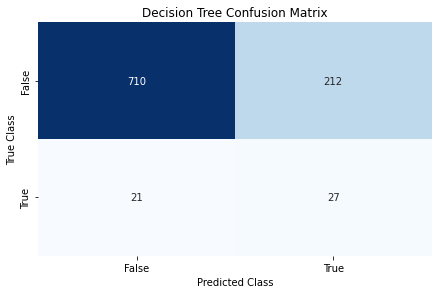


Recall: 0.5625
Precision: 0.11297071129707113
F1_score: 0.18815331010452963
Accuracy: 0.7597938144329897

***********************************************************************

recall_score_train: 0.9392624728850325
precision_score_train: 0.5261239368165249
f1_score_train: 0.6744548286604362
accuracy_score_train: 0.818733738074588

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       922
           1       0.11      0.56      0.19        48

    accuracy                           0.76       970
   macro avg       0.54      0.67      0.52       970
weighted avg       0.93      0.76      0.83       970


LogisticRegression

Matriz de Confusión:



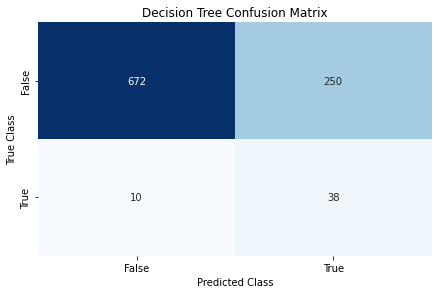


Recall: 0.7916666666666666
Precision: 0.13194444444444445
F1_score: 0.2261904761904762
Accuracy: 0.7319587628865979

***********************************************************************

recall_score_train: 0.8427331887201736
precision_score_train: 0.43898305084745765
f1_score_train: 0.5772659732540862
accuracy_score_train: 0.7532523850823938

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       922
           1       0.13      0.79      0.23        48

    accuracy                           0.73       970
   macro avg       0.56      0.76      0.53       970
weighted avg       0.94      0.73      0.81       970


[10:19:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core,

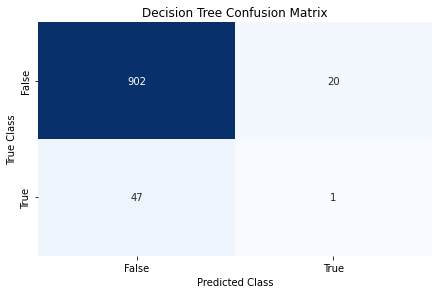


Recall: 0.020833333333333332
Precision: 0.047619047619047616
F1_score: 0.028985507246376812
Accuracy: 0.9309278350515464

***********************************************************************

recall_score_train: 0.9848156182212582
precision_score_train: 1.0
f1_score_train: 0.9923497267759563
accuracy_score_train: 0.9969644405897659

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       922
           1       0.05      0.02      0.03        48

    accuracy                           0.93       970
   macro avg       0.50      0.50      0.50       970
weighted avg       0.91      0.93      0.92       970


RandomForestClassifier

Matriz de Confusión:



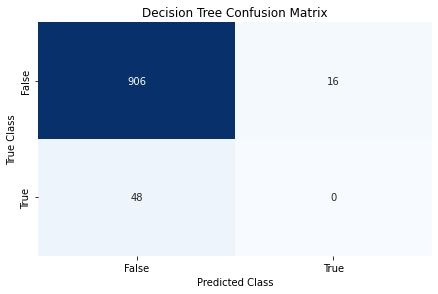


Recall: 0.0
Precision: 0.0
F1_score: 0.0
Accuracy: 0.934020618556701

***********************************************************************

recall_score_train: 1.0
precision_score_train: 1.0
f1_score_train: 1.0
accuracy_score_train: 1.0

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       922
           1       0.00      0.00      0.00        48

    accuracy                           0.93       970
   macro avg       0.47      0.49      0.48       970
weighted avg       0.90      0.93      0.92       970


LGBMClassifier

Matriz de Confusión:



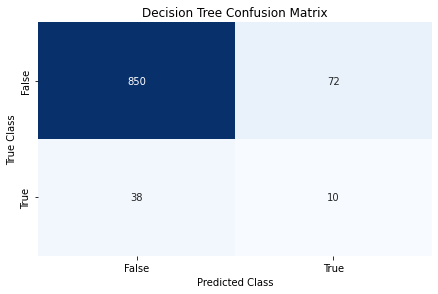


Recall: 0.20833333333333334
Precision: 0.12195121951219512
F1_score: 0.15384615384615383
Accuracy: 0.8865979381443299

***********************************************************************

recall_score_train: 0.9967462039045553
precision_score_train: 0.87774594078319
f1_score_train: 0.9334687658710005
accuracy_score_train: 0.9715958369470945

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       922
           1       0.12      0.21      0.15        48

    accuracy                           0.89       970
   macro avg       0.54      0.57      0.55       970
weighted avg       0.92      0.89      0.90       970




In [79]:
#train_evaluate("KNeighborsClassifier",KNeighborsClassifier )
train_evaluate("SVC",SVC )
train_evaluate("LogisticRegression",LogisticRegression )
#train_evaluate("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis )
#train_evaluate("GaussianNB",GaussianNB )

#train_evaluate("GradientBoostingClassifier",GradientBoostingClassifier )
train_evaluate("XGBClassifier",XGBClassifier )
train_evaluate("RandomForestClassifier",RandomForestClassifier )
#train_evaluate("AdaBoostClassifier",AdaBoostClassifier )

train_evaluate("LGBMClassifier",LGBMClassifier )
#train_evaluate("CatBoostClassifier",CatBoostClassifier )

In [80]:
# Ejemplo cross-validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [81]:
#from sklearn.metrics import recall_score
#from sklearn.metrics import make_scorer

In [82]:
from sklearn.model_selection import RandomizedSearchCV
#GridSearchCV

In [104]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [700,750,800],
              'max_depth'     : [3],
              'subsample'     : [1],
              'learning_rate' : [0.01],
              'reg_alpha'     : [0.1,0.25,0.5,0.75,1],
              'reg_lambda'    : [8,16],
              "min_child_weight" : [15,20,25],
              'scale_pos_weight' : [5]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = XGBClassifier(random_state=42),
        param_grid = param_grid,
        scoring    = ['recall', 'precision', 'f1', 'accuracy'],
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, # nos quedamos con 200 en cross validation después de hacer pruebas con varios valores
        refit      = False,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_recall', ascending = False) \
    .head(50)

param_learning_rate param_max_depth param_min_child_weight  \
0                 0.01               3                     15   
21                0.01               3                     15   
2                 0.01               3                     15   
27                0.01               3                     15   
16                0.01               3                     15   
23                0.01               3                     15   
18                0.01               3                     15   
9                 0.01               3                     15   
5                 0.01               3                     15   
6                 0.01               3                     15   
65                0.01               3                     25   
3                 0.01               3                     15   
11                0.01               3                     15   
13                0.01               3                     15   
15                0.01               3                     15   
4                 0.01               3                     15   
39                0.01               3                     20   
35                0.01               3                     20   
63                0.01               3                     25   
37                0.01               3                     20   
31                0.01               3                     20   
7                 0.01               3                     15   
1                 0.01               3                     15   
28                0.01               3                     15   
29                0.01               3                     15   
19                0.01               3                     15   
12                0.01               3                     15   
17                0.01               3                     15   
14                0.01               3                     15   
33                0.01               3                     20   
69                0.01               3                     25   
67                0.01               3                     25   
8                 0.01               3                     15   
26                0.01               3                     15   
24                0.01               3                     15   
80                0.01               3                     25   
66                0.01               3                     25   
78                0.01               3                     25   
60                0.01               3                     25   
76                0.01               3                     25   
62                0.01               3                     25   
10                0.01               3                     15   
85                0.01               3                     25   
61                0.01               3                     25   
70                0.01               3                     25   
82                0.01               3                     25   
25                0.01               3                     15   
20                0.01               3                     15   
59                0.01               3                     20   
74                0.01               3                     25   

   param_n_estimators param_reg_alpha param_reg_lambda param_scale_pos_weight  \
0                 700             0.1                8                      5   
21                800             0.1               16                      5   
2                 700            0.25                8                      5   
27                800            0.75               16                      5   
16                750            0.75                8                      5   
23                800            0.25               16                      5   
18                750               1                8                      5   
9                 700               1  

In [105]:
resultados.filter(regex = '(param*|mean_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_recall', ascending = True)

param_learning_rate param_max_depth param_min_child_weight  \
50                0.01               3                     20   
52                0.01               3                     20   
40                0.01               3                     20   
54                0.01               3                     20   
58                0.01               3                     20   
..                 ...             ...                    ...   
27                0.01               3                     15   
23                0.01               3                     15   
2                 0.01               3                     15   
21                0.01               3                     15   
0                 0.01               3                     15   

   param_n_estimators param_reg_alpha param_reg_lambda param_scale_pos_weight  \
50                800             0.1                8                      5   
52                800            0.25                8                      5   
40                750             0.1                8                      5   
54                800             0.5                8                      5   
58                800               1                8                      5   
..                ...             ...              ...                    ...   
27                800            0.75               16                      5   
23                800            0.25               16                      5   
2                 700            0.25                8                      5   
21                800             0.1               16                      5   
0                 700             0.1                8                      5   

   param_subsample  mean_test_recall  mean_train_recall  mean_test_precision  \
50               1          0.897092           0.944419             0.464430   
52               1          0.897092           0.944690             0.464721   
40               1          0.898161           0.943877             0.460824   
54               1          0.898179           0.944961             0.464984   
58               1          0.898179           0.943335             0.466926   
..             ...               ...                ...                  ...   
27               1          0.910088           0.944419             0.463406   
23               1          0.910088           0.945504             0.464138   
2                1          0.911152           0.947402             0.459406   
21               1          0.911163           0.945233             0.463982   
0                1          0.912244           0.949570             0.460409   

    mean_train_precision  mean_test_f1  mean_train_f1  mean_test_accuracy  \
50              0.492571      0.611497       0.647336            0.773420   
52              0.492603      0.611700       0.647419            0.773637   
40              0.487251      0.608691       0.642619            0.770167   
54              0.491636      0.612148       0.646645            0.773853   
58              0.491088      0.613863       0.645806            0.775371   
..                   ...           ...            ...                 ...   
27              0.485340      0.613792       0.641094            0.771903   
23              0.486113      0.614460       0.642012            0.772553   
2               0.479600      0.610658       0.636757            0.768434   
21              0.485761      0.614578       0.641647            0.772336   
0               0.481465      0.611774       0.638895            0.769302   

    mean_train_accuracy  
50             0.793963  
52             0.793963  
40             0.789843  
54             0.793204  
58             0.792824  
..                  ...  
27             0.788379  
23             0.788976  
2              0.783718  
21             0.788705  
0              0.785235  

[90 rows x 16 columns]

In [106]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
modelo_final_XGBClassifier = grid.best_estimator_

* Se guarda modeloXGB y el transformer

In [108]:
import pickle
pickle.dump(modelo_final_XGBClassifier, open('modelo_final_XGBClassifier.pkl', 'wb'))
pickle.dump(transformer, open('transformer.pkl', 'wb'))

* Se prueba que el modelo está bien guardado

In [109]:
modeloprueba = pickle.load(open('modelo_final_XGBClassifier.pkl', 'rb'))

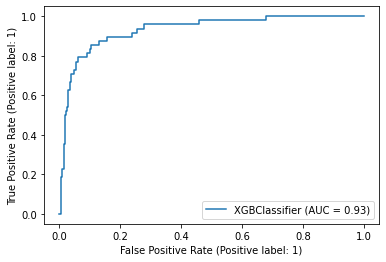

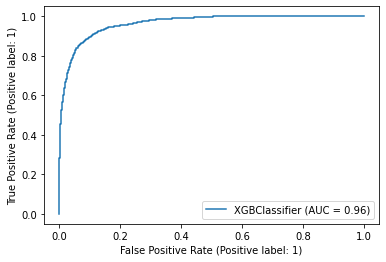

In [115]:
from sklearn.metrics import plot_roc_curve
from sklearn import datasets, metrics, model_selection, svm

metrics.plot_roc_curve(modeloprueba, X_test, y_test)
metrics.plot_roc_curve(modeloprueba, X_train, y_train)
plt.show()

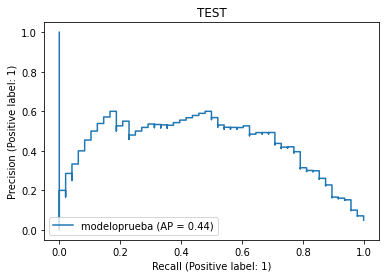

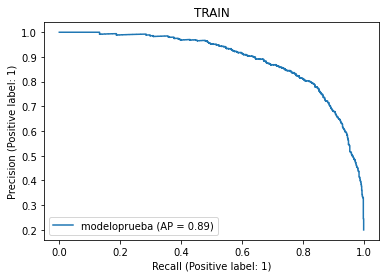

In [117]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    modeloprueba, X_test, y_test, name="modeloprueba"
)
_ = display.ax_.set_title("TEST")
display = PrecisionRecallDisplay.from_estimator(
    modeloprueba, X_train, y_train, name="modeloprueba"
)
_ = display.ax_.set_title("TRAIN")

## LGBMClassifier

In [86]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'learning_rate' : [0.1],
              'n_estimators' : [800], 
              'num_leaves': [2], # large num_leaves helps improve accuracy but might lead to over-fitting 
               'subsample' : [0.3], 
               'reg_alpha' : [0.25], 
               'reg_lambda' : [3], 
               "min_child_weight" : [20], 
               'scale_pos_weight' : [5] } 
# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = LGBMClassifier(random_state=42),
        param_grid = param_grid,
        scoring    = 'recall',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=10, n_repeats=1, random_state=42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(20)

param_learning_rate param_min_child_weight param_n_estimators  \
0                 0.1                     20                800   

  param_num_leaves param_reg_alpha param_reg_lambda param_scale_pos_weight  \
0                2            0.25                3                      5   

  param_subsample  mean_test_score  mean_train_score  
0             0.3         0.910288          0.919371

In [87]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.1, 'min_child_weight': 20, 'n_estimators': 800, 'num_leaves': 2, 'reg_alpha': 0.25, 'reg_lambda': 3, 'scale_pos_weight': 5, 'subsample': 0.3} : 0.9102880250574268 recall


In [88]:
modelo_final_LGBMClassifier = grid.best_estimator_

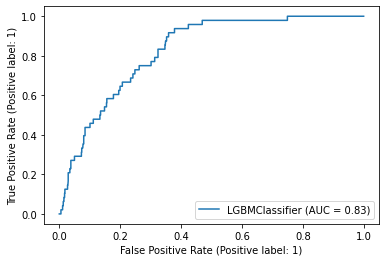

In [89]:
metrics.plot_roc_curve(modelo_final_LGBMClassifier, X_test, y_test)
plt.show()

In [98]:
#Cross Validation
cv_LGBMC_sm = cross_validate(modelo_final_LGBMClassifier, X_train, y_train, cv=100,scoring= 'recall')
sorted(cv_LGBMC_sm.keys())
cv_LGBMC_sm['test_score']

array([0.7       , 0.7       , 1.        , 1.        , 0.8       ,
       0.8       , 0.6       , 0.9       , 0.6       , 0.5       ,
       0.7       , 0.9       , 0.77777778, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.77777778, 1.        ,
       1.        , 1.        , 1.        , 0.77777778, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 0.77777778,
       1.        , 1.        , 0.88888889, 0.77777778, 0.77777778,
       0.88888889, 0.88888889, 1.        , 0.66666667, 1.        ,
       0.88888889, 1.        , 1.        , 1.        , 1.        ,
       0.88888889, 1.        , 0.88888889, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.88888889, 0.88888889,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.77777778, 1.        , 0.88888889, 0.88888889, 0.88888889,
       1.        , 0.77777778, 0.88888889, 0.77777778, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [99]:
#Recall / cross_validation
cv_LGBMC_sm_recall =sum(cv_LGBMC_sm['test_score'])/len(cv_LGBMC_sm['test_score'])

In [100]:
cv_LGBMC_sm_recall

0.9096666666666661

LGBMClassifier(min_child_weight=20, n_estimators=800, num_leaves=2,
               random_state=42, reg_alpha=0.25, reg_lambda=3,
               scale_pos_weight=5, subsample=0.3)

Matriz de Confusión:




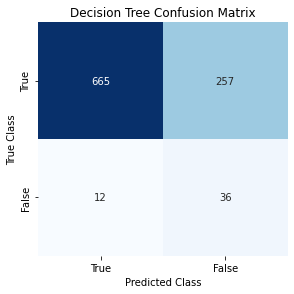



Recall: 0.75
Precision: 0.12286689419795221
F1_score: 0.21114369501466274
Accuracy: 0.722680412371134

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       922
           1       0.12      0.75      0.21        48

    accuracy                           0.72       970
   macro avg       0.55      0.74      0.52       970
weighted avg       0.94      0.72      0.80       970


recall_score_train: 0.928416485900217
precision_score_train: 0.4500525762355415
f1_score_train: 0.6062322946175637
accuracy_score_train: 0.7588898525585429


El recall del cross_validate es: 90.97 %

El overfitting del cross_validate (test) y train es -2.50 % 




In [103]:
y_predict = modelo_final_LGBMClassifier.predict(X_test)
y_pred_train= modelo_final_LGBMClassifier.predict(X_train)

#recall del modelo
recall_test_predict_sm= recall_score(y_test, y_predict)
#recall del train
recall_train_sm = recall_score(y_train,y_pred_train)

print(modelo_final_LGBMClassifier)
print()
#Matriz de confusion
print(f"Matriz de Confusión:")
print()
print()
con_matrix = confusion_matrix(y_test, y_predict)
classes_names = ['True', 'False']
con_matrix_ConfusionMatrix = pd.DataFrame(con_matrix, index=classes_names, columns=classes_names)
plt.figure(figsize=(4, 4))
sns.heatmap(con_matrix_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


accur = accuracy_score(y_test, y_predict)
preci = precision_score(y_test, y_predict)
recal = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
class_repor = classification_report(y_test, y_predict)

y_pred_train= modelo_final_LGBMClassifier.predict(X_train)

accur_train = accuracy_score(y_train, y_pred_train)
preci_train = precision_score(y_train, y_pred_train)
recal_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
print()
print()
print(f"Recall: {recal}")
print(f"Precision: {preci}")
print(f"F1_score: {f1}")
print(f"Accuracy: {accur}")
print()
print(f"Reporte de Clasificación:")
print()
print(class_repor)
print()
print(f"recall_score_train: {recal_train}")
print(f"precision_score_train: {preci_train}")
print(f"f1_score_train: {f1_train}")
print(f"accuracy_score_train: {accur_train}")
print()
print()
print("El recall del cross_validate es: {:.2f} %".format(100 * cv_LGBMC_sm_recall))
print()
print("El overfitting del cross_validate (test) y train es {:.2f} % ".format(((cv_LGBMC_sm_recall - recall_train_sm)/recall_test_predict_sm) *100))
print()
print()